In [2]:
import pandas as pd 

data = {
"Имя": ["Анна", "Иван", "Ольга", None, "Мария"],
"Возраст": [25, 30, None, 40, 35],
"Город": ["Москва", None, "Казань", "Новосибирск", "СПб"]
}
df = pd.DataFrame(data)

print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2  Ольга      NaN       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


# Метод .isna() (эквивалент .isnull())

In [5]:
print(df.isna())

     Имя  Возраст  Город
0  False    False  False
1  False    False   True
2  False     True  False
3   True    False  False
4  False    False  False


### Чтобы подсчитать количество пропусков в каждом столбце, используем .sum() :

In [6]:
print(df.isna().sum())

Имя        1
Возраст    1
Город      1
dtype: int64


# Метод .notna() (эквивалент .notnull() )

In [7]:
print(df.notna())

     Имя  Возраст  Город
0   True     True   True
1   True     True  False
2   True    False   True
3  False     True   True
4   True     True   True


### Чтобы подсчитать количество заполненных значений, используем .sum() :

In [8]:
print(df.notna().sum())

Имя        4
Возраст    4
Город      4
dtype: int64


# Визуализация пропусков с missingno

In [3]:
import  numpy as np

# Генерируем DataFrame с пропусками
np.random. seed(42)

data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий",
"Елена", "Сергей", "Алина", "Артем"],
"Возраст": [25, np.nan, 22, 40, 35, np.nan, 28, 31, np.nan, 29],
"Город": ["Москва", "СПб", np.nan, "Новосибирск", "СПб",
"Екатеринбург", np.nan, "Казань", "Томск", np.nan],
"Доход": [50000, 60000, np.nan, 70000, 65000, 55000, 48000,
np.nan, 52000, 58000],
"Образование": [np.nan, "Высшее", "Среднее", "Высшее", np.nan,
"Высшее", "Среднее", "Высшее", np.nan, "Среднее"],
"Стаж работы": [3, 8, 1, 15, 10, np.nan, 5, 7, np.nan, 2]
}

df = pd.DataFrame (data)
print(df)

       Имя  Возраст         Город    Доход Образование  Стаж работы
0     Анна     25.0        Москва  50000.0         NaN          3.0
1     Иван      NaN           СПб  60000.0      Высшее          8.0
2    Ольга     22.0           NaN      NaN     Среднее          1.0
3     Петр     40.0   Новосибирск  70000.0      Высшее         15.0
4    Мария     35.0           СПб  65000.0         NaN         10.0
5  Дмитрий      NaN  Екатеринбург  55000.0      Высшее          NaN
6    Елена     28.0           NaN  48000.0     Среднее          5.0
7   Сергей     31.0        Казань      NaN      Высшее          7.0
8    Алина      NaN         Томск  52000.0         NaN          NaN
9    Артем     29.0           NaN  58000.0     Среднее          2.0


### Визуализация пропусков с MSNO.MATRIX()

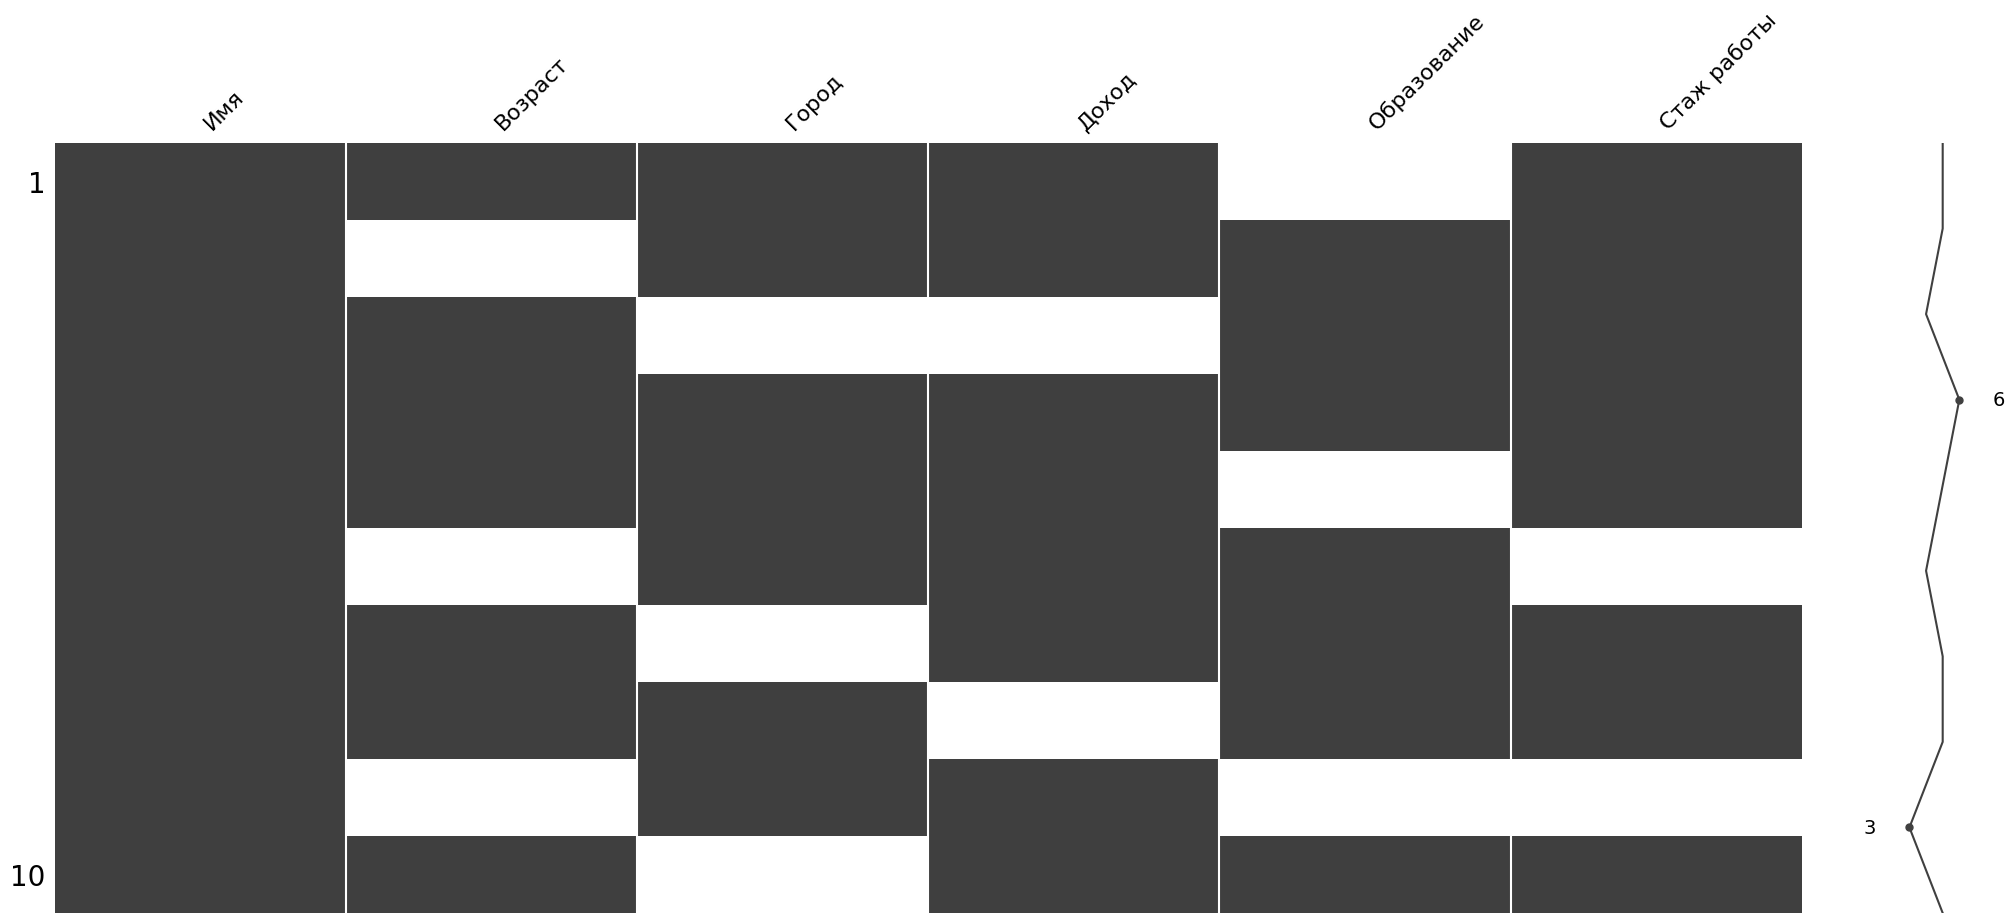

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

### Бар-график пропусков: MSNO.BAR()

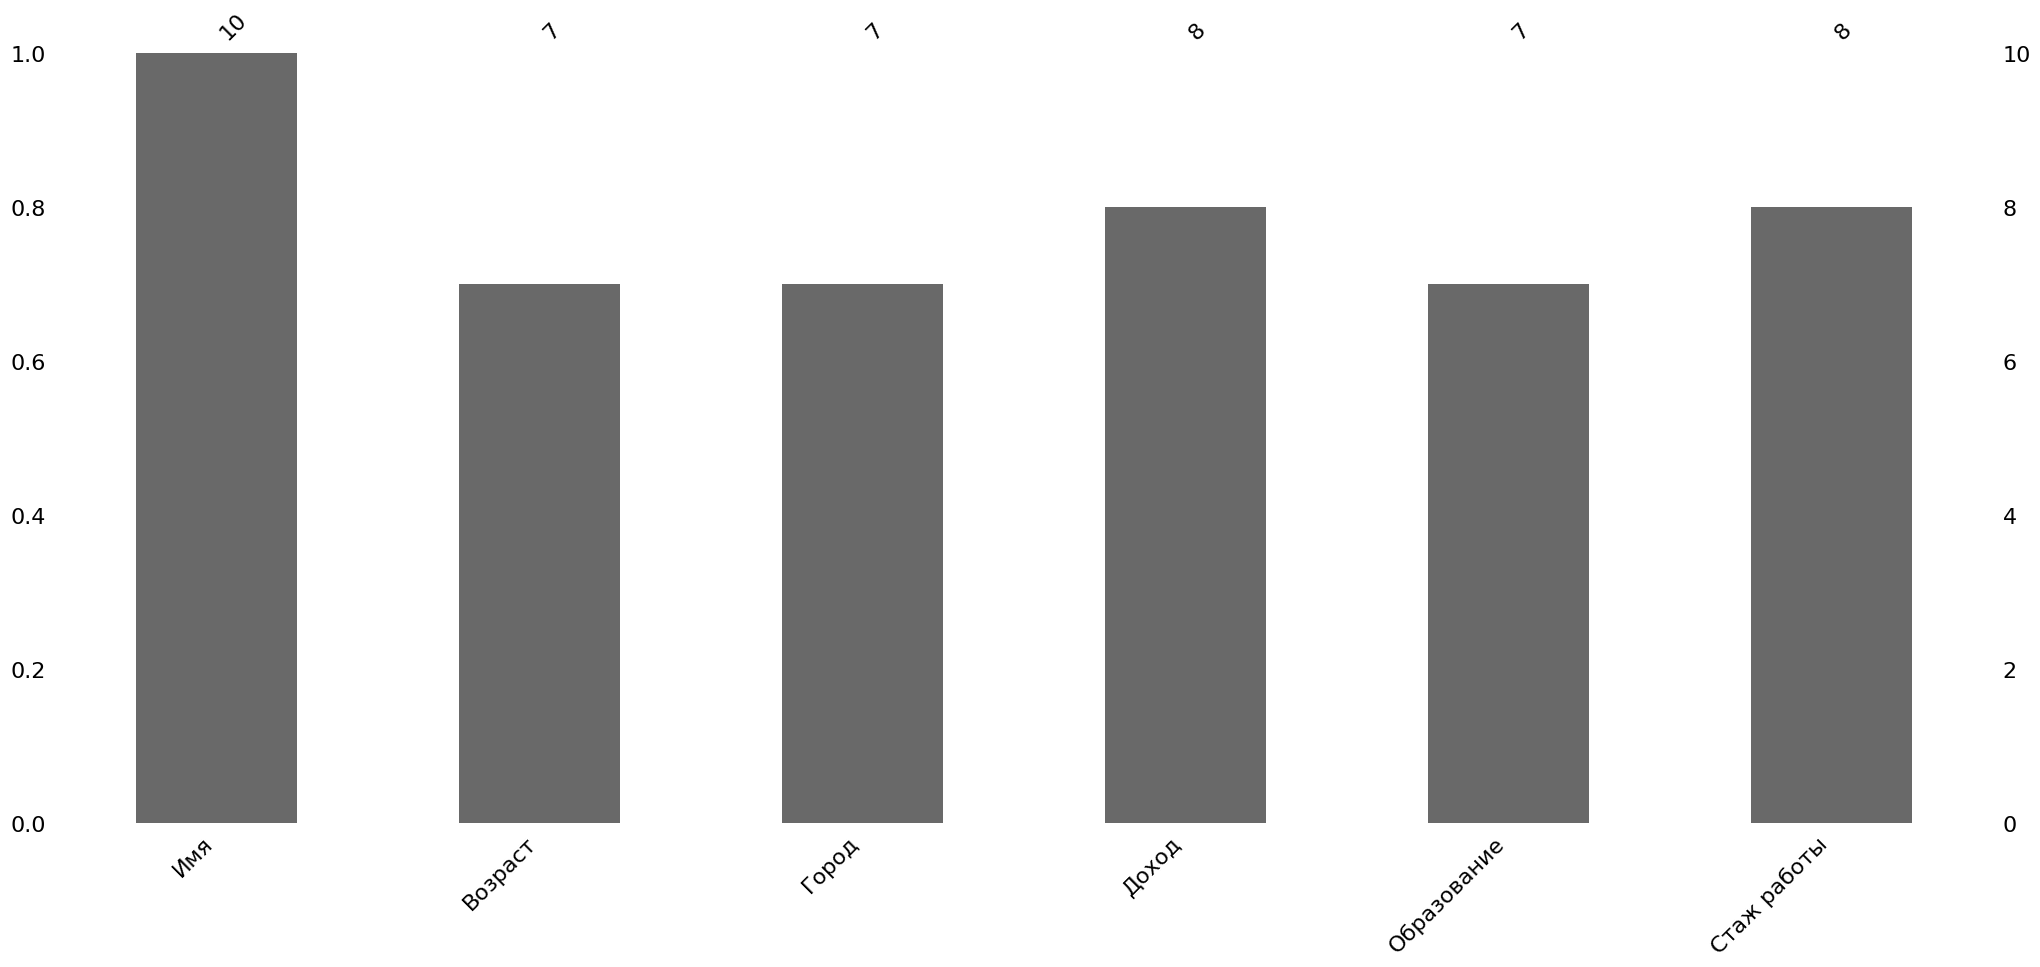

In [15]:
msno.bar(df)
plt.show()

### Тепловая карта пропусков: MSNO.HEATMAP()

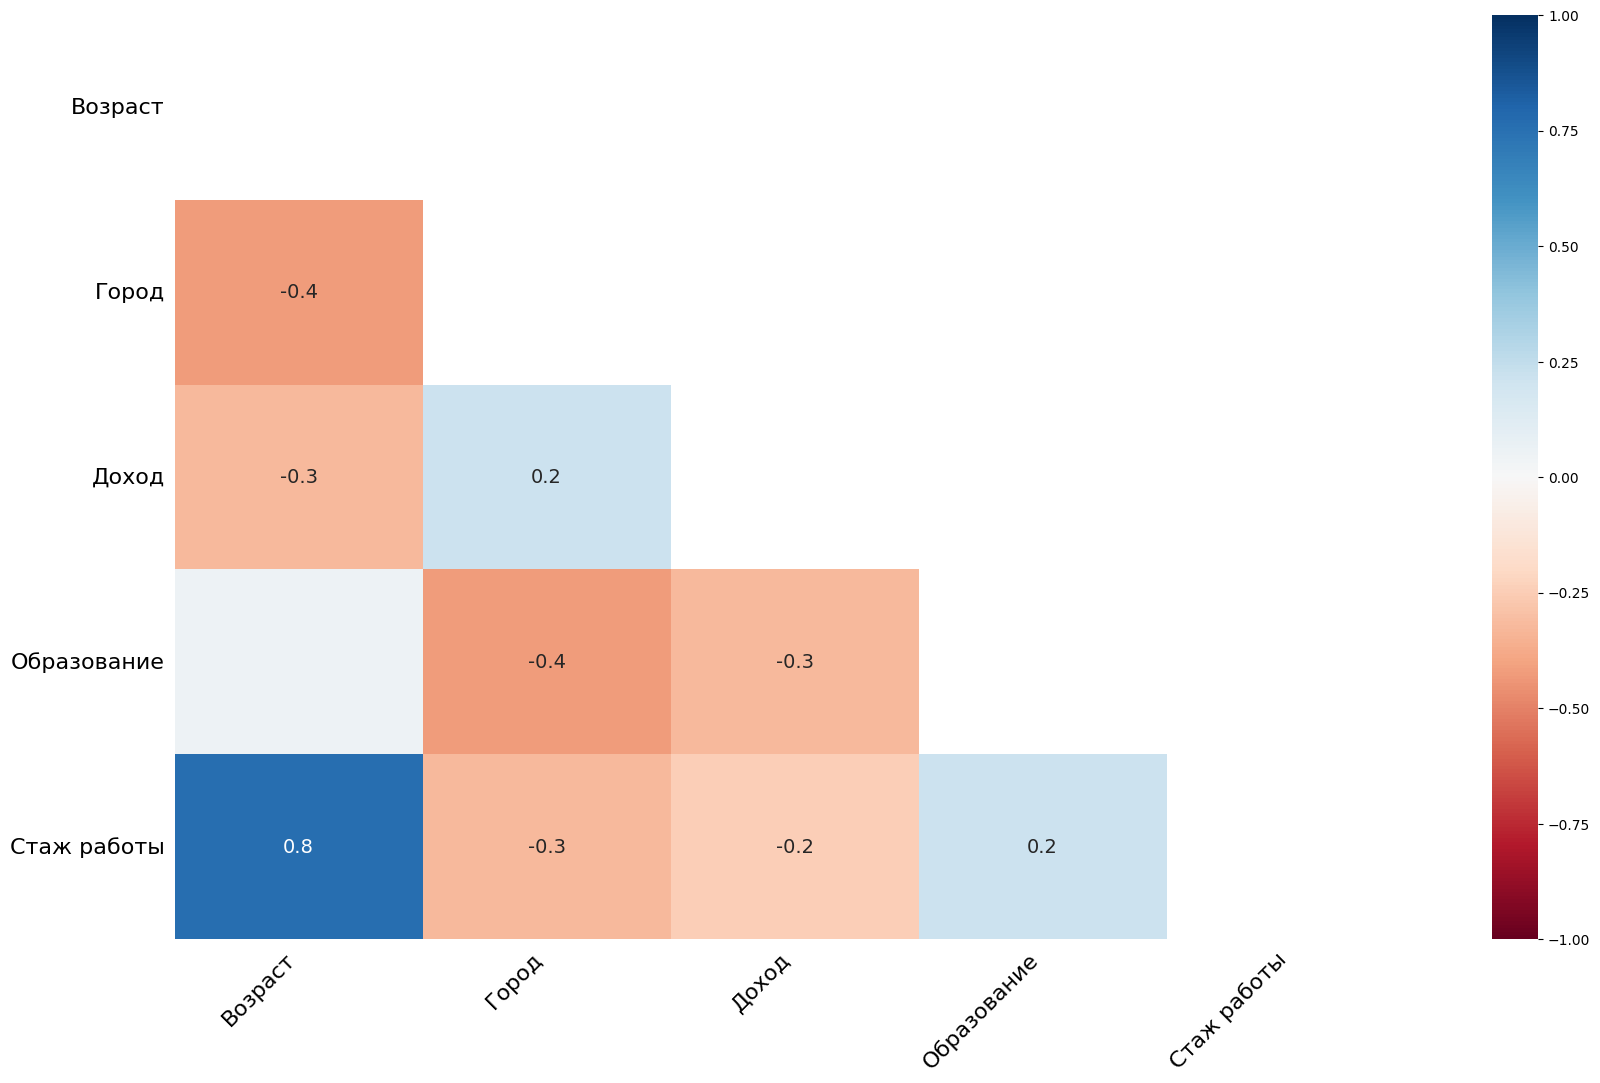

In [16]:
msno.heatmap(df)
plt.show()

# Удаление пропущенных значений в DataFrame

### Удаление строк с пропусками ( dropna() )

In [12]:
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий"],
"Возраст": [25, np.nan, 22, 40, 35, np.nan],
"Город": ["Москва", "СПб", np.nan, "Новосибирск", "СПб",
"Екатеринбург"],
"Доход": [50000, 60000, np.nan, 70000, 65000, 55000]
}

df = pd.DataFrame(data)
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


In [34]:
df_cleaned = df.dropna()
print(df_cleaned)

     Имя  Возраст        Город    Доход
0   Анна     25.0       Москва  50000.0
3   Петр     40.0  Новосибирск  70000.0
4  Мария     35.0          СПб  65000.0


### Удаление строк, где все значения NaN ( how="all" )

In [20]:
df_cleaned = df.dropna(how="all")
print(df_cleaned)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


### Удаление столбцов с пропусками ( dropna(axis=1) )

In [39]:
df_cleaned = df.dropna(axis=1)
print(df_cleaned)

       Имя
0     Анна
1     Иван
2    Ольга
3     Петр
4    Мария
5  Дмитрий


### Удаление строк/столбцов по количеству непустых значений ( thresh )

In [37]:
df_cleaned = df.dropna(thresh=3)
print(df_cleaned)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


In [38]:
df_cleaned = df.dropna(axis = 1, thresh=1)
print(df_cleaned)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


# Заполнение пропусков в DataFrame с помощью .fillna()

### Заполнение константами

In [5]:
df["Возраст"]=df["Возраст"].fillna(30)
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван     30.0           СПб  60000.0
2    Ольга     22.0           NaN      NaN
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий     30.0  Екатеринбург  55000.0


### Заполнение статистическими мерами

In [11]:
mean_value = df["Доход"].mean()
df["Доход"]=df["Доход"].fillna(mean_value)
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван     30.0           СПб  60000.0
2    Ольга     22.0           NaN  60000.0
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий     30.0  Екатеринбург  55000.0


In [13]:
median_value =  df["Доход"].median()
df["Доход"]=df["Доход"].fillna(median_value)
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           NaN  60000.0
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


In [14]:
mode_value = df["Город"].mode()[0]
df["Город"]=df["Город"].fillna(mode_value)
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван      NaN           СПб  60000.0
2    Ольга     22.0           СПб  60000.0
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий      NaN  Екатеринбург  55000.0


### Пропагирование значений (методы ffill и bfill )

In [16]:
df["Возраст"] = df["Возраст"].ffill()
print(df)

       Имя  Возраст         Город    Доход
0     Анна     25.0        Москва  50000.0
1     Иван     25.0           СПб  60000.0
2    Ольга     22.0           СПб  60000.0
3     Петр     40.0   Новосибирск  70000.0
4    Мария     35.0           СПб  65000.0
5  Дмитрий     35.0  Екатеринбург  55000.0


# Интерполяция пропущенных значений в DataFrame с помощью .interpolate()

In [17]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
"день": [1, 2, 3, 4, 5],
"температура": [20.0, np.nan, np.nan, 24.0, 25.0]
})
df["температура_interp"] = df["температура"].interpolate()
print(df)

   день  температура  температура_interp
0     1         20.0           20.000000
1     2          NaN           21.333333
2     3          NaN           22.666667
3     4         24.0           24.000000
4     5         25.0           25.000000


### Полиномиальная интерполяция

In [20]:
df["температура_poly"] = df["температура"].interpolate(method="polynomial", order=2)
print(df)

   день  температура  температура_interp  температура_poly
0     1         20.0           20.000000         20.000000
1     2          NaN           21.333333         21.500000
2     3          NaN           22.666667         22.833333
3     4         24.0           24.000000         24.000000
4     5         25.0           25.000000         25.000000


### Интерполяция временных рядов ( method='time') 

In [41]:
dates = pd.date_range("2024-01-01", periods=5, freq="D")
df = pd.DataFrame({
"дата": dates,
"уровень воды": [1.2, np.nan, np.nan, 1.8, 2.0]
})
df.set_index("дата", inplace=True)
df["интерполяция"] = df["уровень воды"].interpolate(method="time")
print(df)

            уровень воды  интерполяция
дата                                  
2024-01-01           1.2           1.2
2024-01-02           NaN           1.4
2024-01-03           NaN           1.6
2024-01-04           1.8           1.8
2024-01-05           2.0           2.0


# Обработка выбросов в pandas

In [63]:
import pandas as pd
import numpy as np
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий",
"Елена"],
"Баланс на счете": [50000, 60000, 45000, 30000, 65000, 150000,200000]
}
df = pd.DataFrame(data)
print(df)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            30000
4    Мария            65000
5  Дмитрий           150000
6    Елена           200000


### Удаление выбросов по межквартильному размаху (IQR

In [64]:

Q1 = df["Баланс на счете"].quantile(0.25)
Q3 = df["Баланс на счете"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_removed = df[(df["Баланс на счете"] >= lower) & (df["Баланс на счете"] <= upper)]
print(df_removed)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            30000
4    Мария            65000
5  Дмитрий           150000


### Обрезка значений с помощью clip()

In [65]:
df_clipped = df.copy()
df_clipped["Баланс на счете"] = df["Баланс на счете"].clip(lower,
upper)
print(df_clipped)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            30000
4    Мария            65000
5  Дмитрий           150000
6    Елена           197500


### логарифмическое преобразование

In [66]:
df_log = df.copy()
df_log["Лог баланс"] = np.log1p(df["Баланс на счете"])
print(df_log[["Имя", "Баланс на счете", "Лог баланс"]])

       Имя  Баланс на счете  Лог баланс
0     Анна            50000   10.819798
1     Иван            60000   11.002117
2    Ольга            45000   10.714440
3     Петр            30000   10.308986
4    Мария            65000   11.082158
5  Дмитрий           150000   11.918397
6    Елена           200000   12.206078


# Стандартизация признаков

In [67]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Возраст": [25, 30, 22, 40, 35],
"Зарплата": [50000, 60000, 45000, 70000, 65000]
}
df = pd.DataFrame(data)
print(df)

     Имя  Возраст  Зарплата
0   Анна       25     50000
1   Иван       30     60000
2  Ольга       22     45000
3   Петр       40     70000
4  Мария       35     65000


### Ручная стандартизация средствами pandas

In [70]:
df_standardized = df.copy()
df_standardized["Возраст"] = (df["Возраст"] - df["Возраст"].mean()) / df["Возраст"].std()
df_standardized["Зарплата"] = (df["Зарплата"] - df["Зарплата"].mean()) / df["Зарплата"].std()
print(df_standardized)

     Имя   Возраст  Зарплата
0   Анна -0.739657 -0.771589
1   Иван -0.054789  0.192897
2  Ольга -1.150577 -1.253831
3   Петр  1.314945  1.157383
4  Мария  0.630078  0.675140


### Стандартизация с использованием StandardScaler

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])

df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

     Имя   Возраст  Зарплата
0   Анна -0.826961 -0.862662
1   Иван -0.061256  0.215666
2  Ольга -1.286384 -1.401826
3   Петр  1.470153  1.293993
4  Мария  0.704448  0.754829


# Нормализация признаков

### Ручная нормализация средствами pandas

In [74]:
df_normalized = df.copy()
df_normalized["Возраст"] = (df["Возраст"] - df["Возраст"].min()) / (df["Возраст"].max() - df["Возраст"].min()) 
df_normalized["Зарплата"] = (df["Зарплата"] - df["Зарплата"].min()) / (df["Зарплата"].max() - df["Зарплата"].min())
print(df_normalized)

     Имя   Возраст  Зарплата
0   Анна  0.166667       0.2
1   Иван  0.444444       0.6
2  Ольга  0.000000       0.0
3   Петр  1.000000       1.0
4  Мария  0.722222       0.8


### Нормализация с использованием MinMaxScaler

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

     Имя   Возраст  Зарплата
0   Анна  0.166667       0.2
1   Иван  0.444444       0.6
2  Ольга  0.000000       0.0
3   Петр  1.000000       1.0
4  Мария  0.722222       0.8


# Робастное масштабирование признако

In [78]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий",
"Елена"],
"Возраст": [25, 30, 22, 40, 35, 120, 5], # выбросы: 120, 5
"Зарплата": [50000, 60000, 45000, 70000, 65000, 1000000, 10000] #выбросы: 1000000, 10000
}

df = pd.DataFrame(data)
print(df)

       Имя  Возраст  Зарплата
0     Анна       25     50000
1     Иван       30     60000
2    Ольга       22     45000
3     Петр       40     70000
4    Мария       35     65000
5  Дмитрий      120   1000000
6    Елена        5     10000


###  Робастное масштабирование средствами pandas

In [80]:
df_robust = df.copy()
for col in ["Возраст", "Зарплата"]:
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df_robust[col] = (df[col] - median) / iqr
print(df_robust)

       Имя   Возраст  Зарплата
0     Анна -0.357143     -0.50
1     Иван  0.000000      0.00
2    Ольга -0.571429     -0.75
3     Петр  0.714286      0.50
4    Мария  0.357143      0.25
5  Дмитрий  6.428571     47.00
6    Елена -1.785714     -2.50


###  Робастное масштабирование средствами scikit-learn

In [81]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

       Имя   Возраст  Зарплата
0     Анна -0.357143     -0.50
1     Иван  0.000000      0.00
2    Ольга -0.571429     -0.75
3     Петр  0.714286      0.50
4    Мария  0.357143      0.25
5  Дмитрий  6.428571     47.00
6    Елена -1.785714     -2.50


# Label Encoding

In [83]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Образование": ["среднее", "высшее", "начальное", "высшее",
"среднее"]
}
df = pd.DataFrame(data)
print(df)

     Имя Образование
0   Анна     среднее
1   Иван      высшее
2  Ольга   начальное
3   Петр      высшее
4  Мария     среднее


### Label Encoding с использованием pandas.factorize()

In [84]:
df_encoded = df.copy()
df_encoded["Образование"] = pd.factorize(df["Образование"])[0]
print(df_encoded)

     Имя  Образование
0   Анна            0
1   Иван            1
2  Ольга            2
3   Петр            1
4  Мария            0


### Label Encoding с использованием pandas.map()

In [85]:
ordered_mapping = {
"начальное": 0,
"среднее": 1,
"высшее": 2
}
df_ordered = df.copy()
df_ordered["Образование"] = df["Образование"].map(ordered_mapping)
print(df_ordered)

     Имя  Образование
0   Анна            1
1   Иван            2
2  Ольга            0
3   Петр            2
4  Мария            1


###  Label Encoding с использованием OrdinalEncoder из scikit-learn

In [86]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["начальное", "среднее",
"высшее"]])
X = df[["Образование"]]
X_encoded = encoder.fit_transform(X)
df_encoded = df.copy()
df_encoded["Образование"] = X_encoded
print(df_encoded)

     Имя  Образование
0   Анна          1.0
1   Иван          2.0
2  Ольга          0.0
3   Петр          2.0
4  Мария          1.0


# One-Hot Encoding

In [87]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Город": ["Москва", "СПб", "Казань", "Москва", "Казань"]
}
df = pd.DataFrame(data)
print(df)

     Имя   Город
0   Анна  Москва
1   Иван     СПб
2  Ольга  Казань
3   Петр  Москва
4  Мария  Казань


### Кодирование с помощью pandas.get_dummies()

In [89]:

df_encoded = pd.get_dummies(df, columns=["Город"])
print(df_encoded)

     Имя  Город_Казань  Город_Москва  Город_СПб
0   Анна         False          True      False
1   Иван         False         False       True
2  Ольга          True         False      False
3   Петр         False          True      False
4  Мария          True         False      False


### Кодирование с помощью OneHotEncoder из scikit-learn

In [92]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Создаём экземпляр OneHotEncoder
encoder = OneHotEncoder()  # параметр sparse больше не используется

# Применяем к столбцу "Город" и преобразуем разреженную матрицу в массив
encoded = encoder.fit_transform(df[["Город"]]).toarray()

# Создаём DataFrame с новыми колонками
df_encoded = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(["Город"])
)

print(df_encoded)

   Город_Казань  Город_Москва  Город_СПб
0           0.0           1.0        0.0
1           0.0           0.0        1.0
2           1.0           0.0        0.0
3           0.0           1.0        0.0
4           1.0           0.0        0.0


### Target Encoding

In [93]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Олег",
"Светлана"],
"Город": ["Москва", "СПб", "Казань", "Москва", "Казань", "СПб",
"Казань"],
"Доход": [50000, 60000, 45000, 70000, 65000, 58000, 47000]
}
df = pd.DataFrame(data)
print(df)

        Имя   Город  Доход
0      Анна  Москва  50000
1      Иван     СПб  60000
2     Ольга  Казань  45000
3      Петр  Москва  70000
4     Мария  Казань  65000
5      Олег     СПб  58000
6  Светлана  Казань  47000


### Target Encoding средствами pandas

In [94]:
mean_target = df.groupby("Город")["Доход"].mean()
df_encoded = df.copy()
df_encoded["Город"] = df["Город"].map(mean_target)
print(df_encoded)

        Имя         Город  Доход
0      Анна  60000.000000  50000
1      Иван  59000.000000  60000
2     Ольга  52333.333333  45000
3      Петр  60000.000000  70000
4     Мария  52333.333333  65000
5      Олег  59000.000000  58000
6  Светлана  52333.333333  47000
